In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import classification_report


def plot_decision_boundary_with_margin(X, y, model, title):
    # 设置图形大小
    plt.figure(figsize=(8, 6))
    
    # 定义网格范围
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # 预测网格中所有点的类别
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 计算决策函数的值，用于绘制支持向量和间隔
    decision_function = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    decision_function = decision_function.reshape(xx.shape)

    # 绘制决策边界和数据点
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # 绘制支持向量
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
                facecolors='none', edgecolors='k', label='Support Vectors')
    
    # 绘制间隔
    plt.contour(xx, yy, decision_function, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    
    plt.legend()
    plt.show()


## Linear Support Vector Machine

用**间隔**来定义分类器的置信度。即:距离判别界面越远的样本，其预测结果越可信。

远近定义为“间隔”，几何间隔是样本点到判别界面的几何距离；而行数间隔是判别函数带入样本后的函数值。

对于样本 $(\mathbf{x}, y)$，和判别界面 $\mathbf{w}^T\mathbf{x}+b=0$
* 其几何间隔 $\gamma = y\left ( \left ( \dfrac{\mathbf{w}}{\|\mathbf{w}\|^2}\right )^T\mathbf{x} + \dfrac{b}{\|\mathbf{w}\|^2} \right )$
* 其函数间隔 $\hat{\gamma}=y(\mathbf{w}^T\mathbf{x}+b)$

可见，函数间隔与几何间隔满足数值关系：
$$
\gamma = \dfrac{\hat{\gamma}}{\|\mathbf{w}\|^2}
$$

其中，数据集中样本的最小几何/函数间隔，即是数据集的几何/函数间隔。


根据已有的线性可分样本点，我们可以画出多个划分界面正确划分样本。最优间隔分类器则是根据**间隔**这一指标求出让每个样本划分结果都由较高置信度的“最优判别函数”。

即：
* 求解最优化问题
    * 满足 $m$ 个样本点的函数间隔都大于该类样本的函数间隔的情况下
    * 求解参数$w$使得样本的几何间隔最大

该最优化可以表示为：
$$
\begin{aligned}
& \text{max} & &\dfrac{\hat{\gamma}}{\|\mathbf{w}\|^2} \\
& s.t. & &y_{i}(\mathbf{w}^Tx_i+b)\geq\hat{\gamma} & \text{i=1,...,m}
\end{aligned}
$$

* 为了简化问题
    * 假设函数间隔为1，则$\dfrac{\hat{\gamma}}{\|\mathbf{w}\|^2}\to\dfrac{1}{\|\mathbf{w}\|^2}$
    * 最大化问题转换为最小化问题：$\text{max }\dfrac{1}{\|\mathbf{w}\|^2}\to\text{min }\|\mathbf{w}\|^2$

简化后得到最优化问题形式如下：
$$
\begin{aligned}
& \mathop{min}\limits_{\mathbf{w},b} & &\dfrac{1}{2}\|\mathbf{w}\|^2 \\
& s.t. & &y_{i}(\mathbf{w}^T\mathbf{x}_i+b)\geq 1 & \text{i=1,...,m}
\end{aligned}
$$

用拉格朗日乘数法求解上述最优化问题：

$$
\begin{aligned}
&\text{objective function} && \dfrac{1}{2}\|\mathbf{w}\|^2 \\
& \text{constraints} && g_i(\mathbf{w}) = 1 - y_i\left ( \mathbf{w}^T\mathbf{x}_i + b \right ) \leq 0 & \text{i=1,...,m} \\
& \text{lagrange function} && L(\mathbf{w}, b, \alpha) = \dfrac{1}{2}\|\mathbf{w}\|^2 + \sum_i^m \alpha_ig_i(\mathbf{w}) \\
\end{aligned}
$$

其中有**KKT互补条件**：
$$
\alpha^*_ig_i(\mathbf{w}^*)=0\to \left \{
\begin{matrix}
&g_i(\mathbf{w}^*)<0 & \to &\alpha_i^*=0 \\
&\alpha_i^* \neq 0 & \to & g_i(\mathbf{w}^*)=0 &\text{支持向量}
\end{matrix} \right .
$$

令 $L(\mathbf{w},b,\alpha)$ 对 $\mathbf{w}$ 和 $b$ 的偏导为0，可得：
$$
\begin{aligned}
\mathbf{w}^* &= \sum_{i=1}^m\alpha_iy_i\mathbf{x}_i \\
0 &= \sum_i^m \alpha_iy_i
\end{aligned}
$$
带入 $L(\mathbf{w},b,\alpha)$ 即可消去 $w$ 和 $b$，并得到原问题的**对偶问题（Dual Problem）**
$$
\begin{aligned}
&\mathop{max}\limits_{\alpha} && \sum^m_{i=1}\alpha_i-\dfrac{1}{2}\sum_{i=1}^m\sum^m_{j=1}\alpha_i\alpha_jy_iy_j\mathbf{x}_i^T\mathbf{x}_j \\
& \text{s.t.} && \sum^m_{i=1} \alpha_iy_i=0 \\
& && \alpha_i \geq 0 & \text{i=1,...,m}
\end{aligned}
$$


解出 $\alpha$ 后带入：
$$
\begin{aligned}
\mathbf{w}^* &= \sum_{i=1}^m\alpha_iy_i\mathbf{x}_i \\
b^* &= y_s - \mathbf{w}^*x_s & (\mathbf{x}_s,y_s)\text{是支持向量，对应的 }\alpha_s>0
\end{aligned}
$$

考虑到仅由支持向量参与运算
$$
\begin{aligned}
\mathbf{w}^* &= \sum_{s}\alpha_sy_s\mathbf{x}_s \\
b^* &= \dfrac{\sum_s(y_s - (\mathbf{w}^*)^Tx_s)}{\text{支持向量的个数}} & (\mathbf{x}_s,y_s)\text{是支持向量，对应的 }\alpha_s>0
\end{aligned}
$$

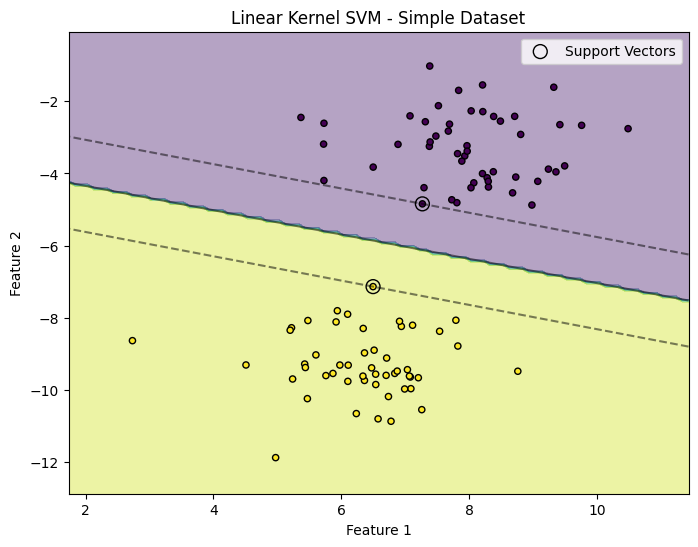

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [2]:
# 简单二分类
X, y = make_blobs(n_samples=100, centers=2, random_state=6)
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X, y)
plot_decision_boundary_with_margin(X, y, svm_linear, 'Linear Kernel SVM - Simple Dataset')

# 分类性能
print(classification_report(y, svm_linear.predict(X)))

在求解过程中发现，线性支持向量机的判别界面仅仅与几个样本点相关，这些样本点称作“支持向量”（Support Vectors）

support vectors：
[[ 7.27059007 -4.84225716]
 [ 6.49868019 -7.13530714]]


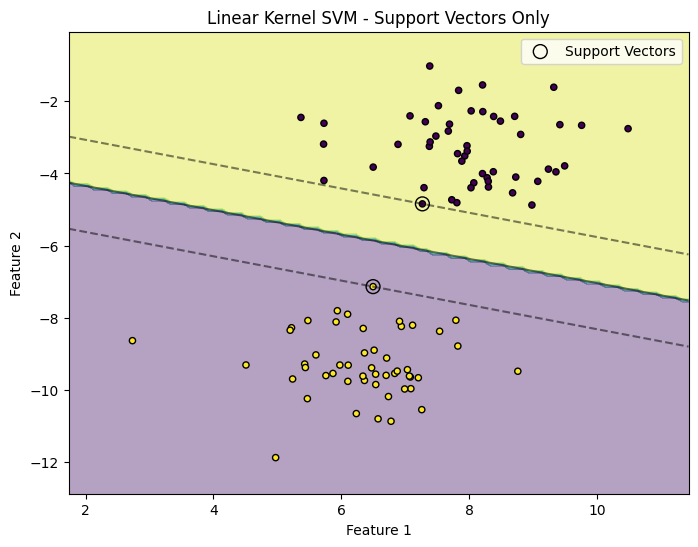

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [3]:
# 支持向量：
print("support vectors：")
print(svm_linear.support_vectors_)

# 支持向量的作用
X_support = svm_linear.support_vectors_
y_support = svm_linear.support_
svm_linear_tiny = SVC(kernel='linear')
# 仅使用 支持向量 训练支持向量机
svm_linear_tiny.fit(X_support, y_support)
plot_decision_boundary_with_margin(X, y, svm_linear_tiny, 'Linear Kernel SVM - Support Vectors Only')
# 仅用支持向量训练的SVM性能
print(classification_report(y, svm_linear.predict(X)))

## 核函数

现实任务中，许多数据需要线性映射到更高维的特征空间进行划分。我们假设将 $\mathbf{x}$ 经过线性映射 $\phi(\mathbf{x})$ 后线性可分，则

原问题：

$$\begin{aligned}& \mathop{min}\limits_{\mathbf{w},b} && \dfrac{1}{2}\|\mathbf{w}\|^2 \\& \text{s.t.} && y_i(\mathbf{w}^T\phi(\mathbf{x}_i) + b) \geq 1 & \text{i=1,...,m}\end{aligned}$$
    
对偶问题：

$$\begin{aligned}&\mathop{max}\limits_{\alpha}&&\sum_{i=1}^m\alpha_i-\dfrac{1}{2}\sum^m_{i,j=1}\alpha_i\alpha_jy_iy_j\phi(\mathbf{x}_i)^T\phi(\mathbf{x}_j) \\ & \text{s.t.}&& \alpha_i \geq 0 \\ &&& \sum_{i=1}^m\alpha_iy_i=0\end{aligned}$$

在上述对偶问题中，$\phi(\mathbf{x}_i)^T\phi(\mathbf{x}_j)$一项计算困难。我们假设有一个函数 $\kappa(\mathbf{x}_i, \mathbf{x}_j)$，其值刚好等于 $\phi(\mathbf{x}_i)^T\phi(\mathbf{x}_j)$。即：

$$\kappa(\mathbf{x}_i,\mathbf{x}_j)=\left < \phi(\mathbf{x}_i), \phi(\mathbf{x}_j)\right >=\phi(\mathbf{x}_i)^T\phi(\mathbf{x}_j)$$



此时，对偶问题形式为

$$\begin{aligned}&\mathop{max}\limits_{\alpha}&&\sum_{i=1}^m\alpha_i-\dfrac{1}{2}\sum^m_{i,j=1}\alpha_i\alpha_jy_iy_j\kappa(\mathbf{x}_i,\mathbf{x}_j) \\ & \text{s.t.}&& \alpha_i \geq 0 \\ &&& \sum_{i=1}^m\alpha_iy_i=0\end{aligned}$$

我们用核函数绕过了线性映射 $\phi(\mathbf{x})$ 与高维空间的内积 $\phi(\mathbf{x}_i)^T\phi(\mathbf{x}_j)$ 两部分的计算。

> 一个核函数 $\kappa(\mathbf{x}_i,\mathbf{x}_j)$可能对应多种线性映射后的内积。

> **定理：核函数**
> 令$X$为输入空间，$\kappa(.,.)$是定义在 $X\times X$ 上的对称函数，则 $\kappa$ 是核函数当且仅当对于任意数据 $D= \{ \mathbf{x}_1, \mathbf{x}_2, \cdots,\mathbf{x}_m\}$, "核矩阵" (kernel matrix) $K$ 总是半正定的：
> 
> $$K_{m\times m} \text{ 其中}K_{i,j}=\kappa(\mathbf{x}_i,\mathbf{x}_j)$$
> 
> 该定理表明，只要一个对称函数所对应的核矩阵半正定，它就能作为核函数使用。事实上，对于一个半正定核矩阵，总能找到一个与之对应的映射 $\phi$。换言之，任何一个核函数都隐式地定义了一个称为“再生核希尔伯特空间" (Reproducing Kernel Hilbert Space, 简称 RKHS) 的特征空间。[^周志华.机器学习]
> 


> **常用核函数**
> |名称|表达式|参数|
> |:-:|:-:|:-:|
> |线性核|$\kappa(\mathbf{x},\mathbf{z})=\mathbf{x}^T\mathbf{z}$||
> |多项式核|$\kappa(\mathbf{x},\mathbf{z})=(\mathbf{x}^T\mathbf{z})^d \text{ or } (\mathbf{x}^T\mathbf{z}+1)^d$ |$d\geq1$为多项式的次数|
> |高斯核|$\kappa(\mathbf{x},\mathbf{z})=exp\left(-\dfrac{\|\mathbf{x}-\mathbf{z}\|^2}{2\sigma^2}\right)$|$\sigma>0$为高斯核的带宽（width）|
> |拉普拉斯核|$\kappa(\mathbf{x},\mathbf{z})=exp\left(-\dfrac{\|\mathbf{x}-\mathbf{z}\|}{\sigma}\right)$|$\sigma>0$|
> |Sigmoid核|$\kappa(\mathbf{x},\mathbf{z})=\tanh{(\beta\mathbf{x}^T\mathbf{z}+\theta)}$|$\beta>0,\theta<0$|
>
> 见周志华的《机器学习》

其中高斯核可以被证明相当于无穷维度映射后的内积

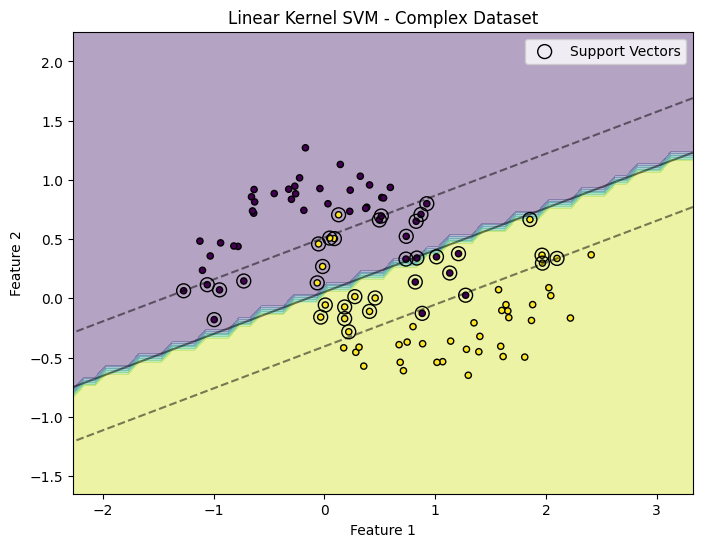

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        50
           1       0.86      0.88      0.87        50

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



In [4]:
X_complex, y_complex = make_moons(n_samples=100, noise=0.15, random_state=42)
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_complex, y_complex)
plot_decision_boundary_with_margin(X_complex, y_complex, svm_linear, 'Linear Kernel SVM - Complex Dataset')

print(classification_report(y_complex, svm_linear.predict(X_complex)))


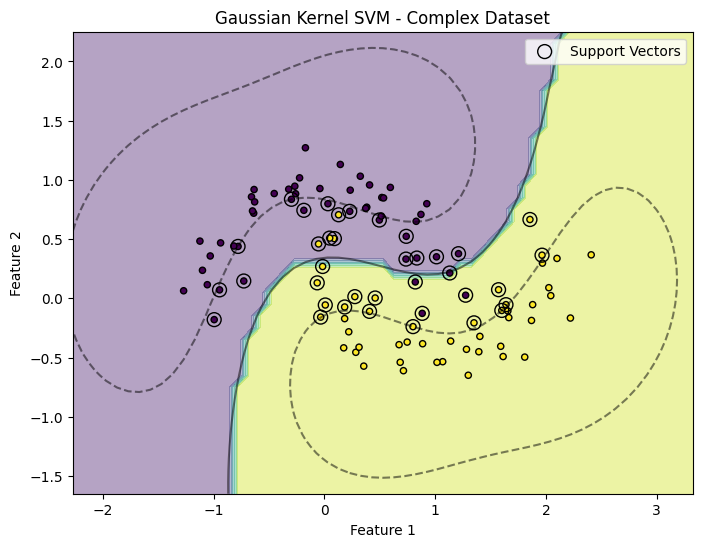

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        50
           1       0.92      0.92      0.92        50

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



In [5]:
# 使用高斯核
svm_rbf = SVC(kernel='rbf', gamma='auto')
svm_rbf.fit(X_complex, y_complex)
plot_decision_boundary_with_margin(X_complex, y_complex, svm_rbf, 'Gaussian Kernel SVM - Complex Dataset')

# 分类性能
print(classification_report(y_complex, svm_rbf.predict(X_complex)))


## 软间隔


如果数据是线性可分的，则可以使用支持向量机很好的解出超平面。但如果数据不是线性可分的，则需要引入软间隔（soft margin）的概念，允许支持向量机在一些样本上“出错”。出错即不满足约束$$y_i(\mathbf{w}^T\mathbf{x}_i+b)\geq 1$$

与之对应的，前边提到将所有样本都正确划分的支持向量机，则是硬间隔（hard margin）支持向量机。

要在最大化间隔的同时，使不满足约束的样本尽可能少，于是优化目标可以写为：
$$
\begin{aligned}
&\mathop{min}\limits_{w,b} && \dfrac{1}{2}\|\mathbf{w}\|^2+C\sum^m_{i=1}l\left(y_i(\mathbf{w}^T\mathbf{x}_i+b)\right)
\end{aligned}
$$

其中 $C>0$ 是一个常数，$l(z)$是“损失函数”，scikit-learn 中使用 hinge loss。

显然：$C$ 越大，允许的“错误”越少，越小则允许的错误越多。

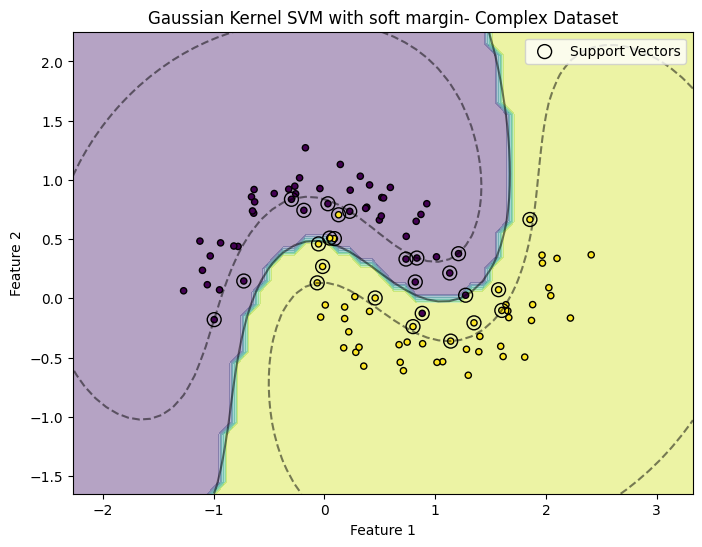

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        50
           1       0.98      0.94      0.96        50

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [6]:
# 使用高斯核
svm_rbf_soft = SVC(kernel='rbf', gamma='auto', C=5)
svm_rbf_soft.fit(X_complex, y_complex)
plot_decision_boundary_with_margin(X_complex, y_complex, svm_rbf_soft, 'Gaussian Kernel SVM with soft margin- Complex Dataset')

# 分类性能
print(classification_report(y_complex, svm_rbf_soft.predict(X_complex)))


## 实际应用，以鸢尾花数据集为例

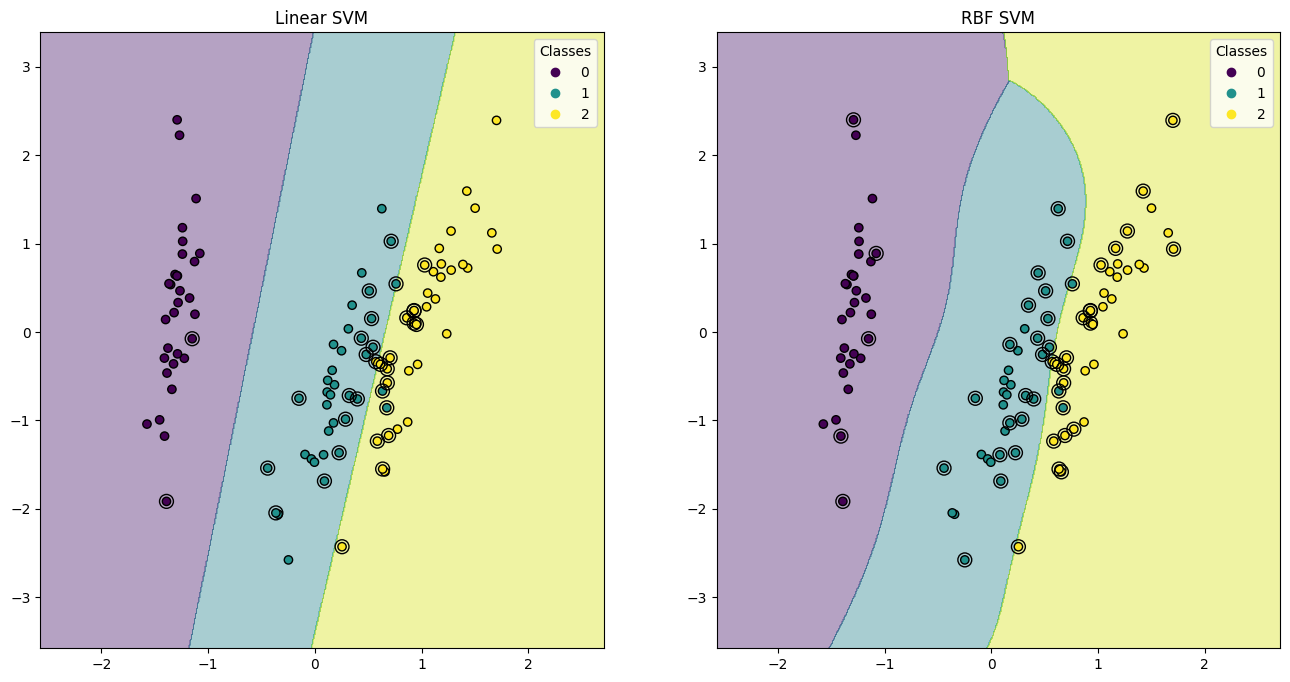

Linear SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

RBF SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [9]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# 1. 导入数据
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 2. PCA降维
pca = PCA(n_components=2)  # 降到2维便于可视化
X_pca = pca.fit_transform(X)

# 3. 标准化
scaler = StandardScaler()
X_std = scaler.fit_transform(X_pca)

# 4. 线性核支持向量机分类
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

# 5. 高斯核支持向量机分类
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
svm_rbf.fit(X_train, y_train)

# 预测
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# 6. 可视化展示两种支持向量机的分类结果，决策边界，支持向量
def plot_svm_boundary(model, X, y, ax, title):
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = np.meshgrid(np.arange(X0.min() - 1, X0.max() + 1, 0.01),
                         np.arange(X1.min() - 1, X1.max() + 1, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    scatter = ax.scatter(X0, X1, c=y, edgecolors='k')
    ax.legend(*scatter.legend_elements(), title="Classes")
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
plot_svm_boundary(svm_linear, X_train, y_train, axes[0], 'Linear SVM')
plot_svm_boundary(svm_rbf, X_train, y_train, axes[1], 'RBF SVM')

plt.show()

# 7. 打印classification report
report_linear = classification_report(y_test, y_pred_linear)
report_rbf = classification_report(y_test, y_pred_rbf)

print("Linear SVM:")
print(report_linear)

print("RBF SVM:")
print(report_rbf)
